# <center> Querying Wikidata with SPARQL</center>
 <font color="#5F6A6A"> <center> An introduction at the <b>Wikidata Zurich Meetup #2 </b> </center> </font> 
   <font color="#5F6A6A"> <center> September 5, 2018. Zurich, Switzerland. </center> </font> 
    <font color="#5F6A6A"> <center> This notebook is licensed by CC-BY-SA </center> </font> 
   <font color="#5F6A6A"> <center> Cristina Sarasua (University of Zurich) </center> </font> 
  <font color="#5F6A6A"> <center> See also <a href="https://www.wikidata.org/wiki/Wikidata:Events/Wikidata_Zurich_Meetup"> Wiki page of the Meetup </a> </center> </font> 
    
  <hr>

## Introduction

Wikidata's data can be accessed in many different ways. Depending on what exactly you would like to access (e.g., item descriptions, or page edit history) you may:
* query the knowledge base live using the RDF-based query language SPARQL 
* download a data dump (i.e., containing a snapshot of the data at a certain point in time)
* query the knowledge base and its edit history live via the Wikidata's instance of the Media Wiki API 
* retrieve concrete item descriptions as Linked Data executing an HTTP GET request

In this hands-on we will focus on querying data items of the knowledge base using the <a href="https://www.w3.org/TR/sparql11-query/">SPARQL query language</a> --- the language that is used to query <a href="https://www.w3.org/DesignIssues/LinkedData.html">Linked Data</a> and <a href="https://cacm.acm.org/magazines/2016/9/206254-a-new-look-at-the-semantic-web/fulltext">Semantic Web data</a> in general.          

## Wikidata Documentation

If you would like to look up further information about Wikidata, I would recommend you read the article at the Communications of the ACM journal, by Denny Vrandečić and Markus Krötzsch: 
<a href="https://cacm.acm.org/magazines/2014/10/178785-wikidata/fulltext">Wikidata: a Free Collaborative, Knowledge Base</a>, and the following information: 

Wikidata's data (model and data access) 

* **Wikidata's Help Page** <br> 
https://www.wikidata.org/wiki/Help:Contents

* **How to access data in Wikidata (general page)** <br>
https://www.wikidata.org/wiki/Wikidata:Data_access

Querying Wikidata with SPARQL

* **Wikidata's SPARQL Query Service** <br>
https://query.wikidata.org/

* **Instructions about how to use the Query Service** <br> https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/A_gentle_introduction_to_the_Wikidata_Query_Service

* **Example queries** <br>
https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/queries/examples

* **Problematic queries** <br>
https://www.mediawiki.org/wiki/Wikidata_Query_Service/Problematic_queries

Querying from Python

* **Wikidata's API** <br>
https://www.wikidata.org/w/api.php

* **Gastrodon Library** <br>
https://github.com/paulhoule/gastrodon

I won't showcase these due to time restrictions, but they are also useful tools to work with SPARQL and RDF data in Python:

* **RDFLib** <br>
https://github.com/RDFLib/rdflib

* **SPARQL Kernel for Jupyter** <br>
https://pypi.org/project/sparqlkernel/

When you try out queries, you often need to look up the names/IDs of items, properties, or maybe you need to look up the way qualifiers and references are stated. In that case, I highly recommend you to look at examples of item descriptions

E.g. https://www.wikidata.org/wiki/Q72
E.g. https://www.wikidata.org/wiki/Q11943 

**Tip!** If you would like to keep up-to-date and discover new very sophisticated SPARQL queries that you can execute, you should not miss the updatey by Wikidata-Facts in Twitter! =)
https://twitter.com/WikidataFacts


In [1]:
                #                    ###                                       ### 
                #       ###### ##### ###  ####      ####   ####  #####  ###### ### 
                #       #        #    #  #         #    # #    # #    # #      ### 
                #       #####    #   #    ####     #      #    # #    # #####   #  
                #       #        #            #    #      #    # #    # #          
                #       #        #       #    #    #    # #    # #    # #      ### 
                ####### ######   #        ####      ####   ####  #####  ###### ### 

<hr>
## Part I - SPARQL and Wikidata Query Service 

The query service is a Web service that accesses Wikidata's data and can be used by humans through this GUI and by programs to execute data queries written in SPARQL. 
 
 ###  https://query.wikidata.org 

<img src="queryservice.jpg"/>

### Exploring SPARQL features

Let's look at the kind of things we can do in SPARQL when we want to query data. 

#### > Get items (ID and label) of a particular type
**Example**: query to retrieve the ID and label of train stations in Zurich

```
select ?item ?itemLabel
where{
  ?item wdt:P31 wd:Q55488 .
  ?item wdt:P131 wd:Q72 .
  SERVICE wikibase:label {
		bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" .
	}
}
```


<a href="https://query.wikidata.org/#select%20%3Fitem%20%3FitemLabel%0Awhere%7B%0A%20%20%3Fitem%20wdt%3AP31%20wd%3AQ55488%20.%0A%20%20%3Fitem%20wdt%3AP131%20wd%3AQ72%20.%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%0A%09%09bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22%20.%0A%09%7D%0A%7D"> Execute this query in the Wikidata Query Service </a>  (Open this link, and click on the "play" symbol to execute the query live).

What if someone described the station using a more specific type of item than train (e.g. dead-end station)? We can use property paths and ask for the items that have been defined as train stations or subclasses of train stations:

```
select ?item ?itemLabel
where{
  ?item wdt:P31/wdt:P279* wd:Q55488 .
   ?item wdt:P131 wd:Q72 .
  SERVICE wikibase:label {
		bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" .
	}
}
```

<img src="query2.jpg"/>

<a href="https://query.wikidata.org/#select%20%3Fitem%20%3FitemLabel%0Awhere%7B%0A%20%20%3Fitem%20wdt%3AP31%2Fwdt%3AP279%2a%20wd%3AQ55488%20.%0A%20%20%20%3Fitem%20wdt%3AP131%20wd%3AQ72%20.%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%0A%09%09bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22%20.%0A%09%7D%0A%7D%0A"> Execute this query in the Wikidata Query Service </a>  (Open this link, and click on the "play" symbol to execute the query live).

We can also order the results by e.g. the label.

````
select ?item ?itemLabel
where{
  ?item wdt:P31/wdt:P279* wd:Q55488 .
   ?item wdt:P131 wd:Q72 .
  SERVICE wikibase:label {
		bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" .
	}
}
ORDER BY ?itemLabel
```

<img src="query2.jpg"/>

<a href="https://query.wikidata.org/#select%20%3Fitem%20%3FitemLabel%0Awhere%7B%0A%20%20%3Fitem%20wdt%3AP31%2Fwdt%3AP279%2a%20wd%3AQ55488%20.%0A%20%20%20%3Fitem%20wdt%3AP131%20wd%3AQ72%20.%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%0A%09%09bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22%20.%0A%09%7D%0A%7D%0AORDER%20BY%20%3FitemLabel"> Execute this query in the Wikidata Query Service </a>  (Open this link, and click on the "play" symbol to execute the query live).

Sometimes, when you ask for some information (e.g., opening date) it can happen that not all stations have that information. So this query will be restrictive and will give you only 16 results (those that have that information): 

```
select ?item ?itemLabel ?openingDate
where{
  ?item wdt:P31/wdt:P279* wd:Q55488 .
   ?item wdt:P131 wd:Q72 .
  ?item wdt:P1619 ?openingDate .
 
  SERVICE wikibase:label {
		bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" .
	}
}

```

<a href="https://query.wikidata.org/#select%20%3Fitem%20%3FitemLabel%20%3FopeningDate%0Awhere%7B%0A%20%20%3Fitem%20wdt%3AP31%2Fwdt%3AP279%2a%20wd%3AQ55488%20.%0A%20%20%20%3Fitem%20wdt%3AP131%20wd%3AQ72%20.%0A%20%20OPTIONAL%7B%3Fitem%20wdt%3AP1619%20%3FopeningDate%7D%0A%20%0A%20%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%0A%09%09bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22%20.%0A%09%7D%0A%7D%0A"> Execute this query in the Wikidata Query Service </a>  (Open this link, and click on the "play" symbol to execute the query live).

What you can do is to "relax" the condition and ask for the stations, and get the opening date (in case they have it). You will still get the other information in the cases where the station does not have the opening date. 

```
select ?item ?itemLabel ?openingDate
where{
  ?item wdt:P31/wdt:P279* wd:Q55488 .
   ?item wdt:P131 wd:Q72 .
  OPTIONAL{?item wdt:P1619 ?openingDate .}
 
  SERVICE wikibase:label {
		bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" .
	}
}
```

<a href="https://query.wikidata.org/#select%20%3Fitem%20%3FitemLabel%20%3FopeningDate%0Awhere%7B%0A%20%20%3Fitem%20wdt%3AP31%2Fwdt%3AP279%2a%20wd%3AQ55488%20.%0A%20%20%20%3Fitem%20wdt%3AP131%20wd%3AQ72%20.%0A%20%20OPTIONAL%7B%3Fitem%20wdt%3AP1619%20%3FopeningDate%20.%7D%0A%20%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%0A%09%09bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22%20.%0A%09%7D%0A%7D%0A"> Execute this query in the Wikidata Query Service </a>  (Open this link, and click on the "play" symbol to execute the query live).

Maybe you would like to retrieve the train stations and bus stations. In that case you can use UNION.

````
select ?item ?itemLabel ?openingDate
where{
  {?item wdt:P31/wdt:P279* wd:Q55488 .} UNION {?item wdt:P31/wdt:P279* wd:Q494829.} 
  
   ?item wdt:P131 wd:Q72 .
  OPTIONAL{?item wdt:P1619 ?openingDate .}
 
  SERVICE wikibase:label {
		bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" .
	}
}

```

You can also count, limit and many more things!

#### > Get Wikipedia and Wikimedia Commons URLs
**Example**: retrieve the id, label of things located in neighbourhoods of Zurich, with their Wikipedia article and Wikimedia commons URL

```
SELECT ?quartier ?item ?itemLabel ?article ?image ?prop
{?item wdt:P131 ?quartier .
 ?quartier wdt:P31 wd:Q19644586 .
  OPTIONAL {?article schema:about ?item .
    ?article schema:isPartOf <https://en.wikipedia.org/>.
 ?item wdt:P18 ?image}

 SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
```

<a href="https://query.wikidata.org/#SELECT%20%3Fquartier%20%3Fitem%20%3FitemLabel%20%3Farticle%20%3Fimage%20%3Fprop%0A%7B%3Fitem%20wdt%3AP131%20%3Fquartier%20.%0A%20%3Fquartier%20wdt%3AP31%20wd%3AQ19644586%20.%0A%20%20OPTIONAL%20%7B%3Farticle%20schema%3Aabout%20%3Fitem%20.%0A%20%20%20%20%3Farticle%20schema%3AisPartOf%20%3Chttps%3A%2F%2Fen.wikipedia.org%2F%3E.%0A%20%3Fitem%20wdt%3AP18%20%3Fimage%7D%0A%0A%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%7D"> Execute this query in the Wikidata Query Service </a>  (Open this link, and click on the "play" symbol to execute the query live).

#### > Federated queries
**Example**: query example from from https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/Federated_queries cited: ''find a value for TOID (P3120) from the UK Ordnance Survey for items that have a GSS code (2011) (P836) but no TOID (P3120):''

```
SELECT ?item ?itemLabel ?gss ?os_toid WHERE {
  	?item p:P836 ?gss_stmt .
    ?gss_stmt ps:P836 ?gss .
    FILTER NOT EXISTS { ?gss_stmt pq:P582 [] } .
    FILTER NOT EXISTS { ?item wdt:P3120 [] } .
  
    SERVICE <http://data.ordnancesurvey.co.uk/datasets/os-linked-data/apis/sparql> {
      ?os_toid <http://data.ordnancesurvey.co.uk/ontology/admingeo/gssCode> ?gss
    }
    SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
```

<a href="https://query.wikidata.org/#SELECT%20%3Fitem%20%3FitemLabel%20%3Fgss%20%3Fos_toid%20WHERE%20%7B%0A%20%20%09%3Fitem%20p%3AP836%20%3Fgss_stmt%20.%0A%20%20%20%20%3Fgss_stmt%20ps%3AP836%20%3Fgss%20.%0A%20%20%20%20FILTER%20NOT%20EXISTS%20%7B%20%3Fgss_stmt%20pq%3AP582%20%5B%5D%20%7D%20.%0A%20%20%20%20FILTER%20NOT%20EXISTS%20%7B%20%3Fitem%20wdt%3AP3120%20%5B%5D%20%7D%20.%0A%20%20%0A%20%20%20%20SERVICE%20%3Chttp%3A%2F%2Fdata.ordnancesurvey.co.uk%2Fdatasets%2Fos-linked-data%2Fapis%2Fsparql%3E%20%7B%0A%20%20%20%20%20%20%3Fos_toid%20%3Chttp%3A%2F%2Fdata.ordnancesurvey.co.uk%2Fontology%2Fadmingeo%2FgssCode%3E%20%3Fgss%0A%20%20%20%20%7D%0A%20%20%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22en%22.%20%7D%0A%7D"> Execute this query in the Wikidata Query Service </a>  (Open this link, and click on the "play" symbol to execute the query live).

### Exploring features of the Wikidata Query Service

#### > Queries using / retrieving qualifiers and references --- two valuable features in Wikidata
**Example**: query to the population of the neighbourhoods of Zurich at a particular point in time, and the source of the information.

```
PREFIX pr: <http://www.wikidata.org/prop/reference/>
PREFIX prov: <http://www.w3.org/ns/prov#>

SELECT ?itemLabel ?itemDescription ?item ?population ?time ?ref WHERE {
  ?item wdt:P625 ?coord.
  ?item wdt:P31 wd:Q19644586.
  ?item wdt:P131 wd:Q72.
  OPTIONAL {
    ?item p:P1082 ?statement.
    ?statement prov:wasDerivedFrom ?source.
    ?source pr:P854 ?ref.
    ?statement ps:P1082 ?population.
    ?statement pq:P585 ?time.
  }
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
```

<a href="https://query.wikidata.org/#PREFIX%20pr%3A%20%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Freference%2F%3E%0APREFIX%20prov%3A%20%3Chttp%3A%2F%2Fwww.w3.org%2Fns%2Fprov%23%3E%0A%0ASELECT%20%3FitemLabel%20%3FitemDescription%20%3Fitem%20%3Fpopulation%20%3Ftime%20%3Fref%20WHERE%20%7B%0A%20%20%3Fitem%20wdt%3AP625%20%3Fcoord.%0A%20%20%3Fitem%20wdt%3AP31%20wd%3AQ19644586.%0A%20%20%3Fitem%20wdt%3AP131%20wd%3AQ72.%0A%20%20OPTIONAL%20%7B%0A%20%20%20%20%3Fitem%20p%3AP1082%20%3Fstatement.%0A%20%20%20%20%3Fstatement%20prov%3AwasDerivedFrom%20%3Fsource.%0A%20%20%20%20%3Fsource%20pr%3AP854%20%3Fref.%0A%20%20%20%20%3Fstatement%20ps%3AP1082%20%3Fpopulation.%0A%20%20%20%20%3Fstatement%20pq%3AP585%20%3Ftime.%0A%20%20%7D%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%7D"> Execute this query in the Wikidata Query Service </a>  (Open this link, and click on the "play" symbol to execute the query live).

<img src="quartierepopulation.jpg"/>

#### > Display query results in a map
**Example**: query to show the mountains of Switzerland in a map, by height (meters above the sea level).

```
#defaultView:Map
SELECT ?item ?itemLabel ?coord ?height ?layer ?image 
WHERE { ?item wdt:P31 wd:Q8502. ?item wdt:P625 ?coord. 
       ?item wdt:P17 wd:Q39.  ?item wdt:P2044 ?height . 
       BIND( IF(?height < 1000, "<1000 metres", 
                IF(?height < 2000, "1000 - 2000 metres", 
                   IF(?height < 3000, "2000 - 3000 metres", 
                      IF(?height < 4000, "3000 - 4000 metres", "> 4000 metres")))) AS ?layer). 
       OPTIONAL {?item wdt:P18 ?image.} 
                                                            
       SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
````

<a href="https://query.wikidata.org/#PREFIX%20pr%3A%20%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Freference%2F%3E%0APREFIX%20prov%3A%20%3Chttp%3A%2F%2Fwww.w3.org%2Fns%2Fprov%23%3E%0A%0ASELECT%20%3FitemLabel%20%3FitemDescription%20%3Fitem%20%3Fpopulation%20%3Ftime%20%3Fref%20WHERE%20%7B%0A%20%20%3Fitem%20wdt%3AP625%20%3Fcoord.%0A%20%20%3Fitem%20wdt%3AP31%20wd%3AQ19644586.%0A%20%20%3Fitem%20wdt%3AP131%20wd%3AQ72.%0A%20%20OPTIONAL%20%7B%0A%20%20%20%20%3Fitem%20p%3AP1082%20%3Fstatement.%0A%20%20%20%20%3Fstatement%20prov%3AwasDerivedFrom%20%3Fsource.%0A%20%20%20%20%3Fsource%20pr%3AP854%20%3Fref.%0A%20%20%20%20%3Fstatement%20ps%3AP1082%20%3Fpopulation.%0A%20%20%20%20%3Fstatement%20pq%3AP585%20%3Ftime.%0A%20%20%7D%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%7D"> Execute this query in the Wikidata Query Service </a>  (Open this link, and click on the "play" symbol to execute the query live).

<img src="querymountains.jpg">

#### > Retrieve _things_ around / in the surrounding area
**Example**: query to retrieve max. 100 libraries around the UZH Zentrum building, with a radius of 2km.

```
#defaultView:Map
SELECT ?thing ?location ?distance ?thingLabel WHERE {
  
    SERVICE wikibase:around { 
      ?thing wdt:P625 ?location . 
      bd:serviceParam wikibase:center "Point(8.548333 47.374722)"^^geo:wktLiteral .
      bd:serviceParam wikibase:radius "2" . 
      bd:serviceParam wikibase:distance ?distance .
    } 
    ?thing wdt:P31/wdt:P279* wd:Q7075
   
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
} ORDER BY ?distance LIMIT 100
````

<a href="https://query.wikidata.org/#%23defaultView%3AMap%0ASELECT%20%3Fthing%20%3Flocation%20%3Fdistance%20%3FthingLabel%20WHERE%20%7B%0A%20%20%0A%20%20%20%20SERVICE%20wikibase%3Aaround%20%7B%20%0A%20%20%20%20%20%20%3Fthing%20wdt%3AP625%20%3Flocation%20.%20%0A%20%20%20%20%20%20bd%3AserviceParam%20wikibase%3Acenter%20%22Point%288.548333%2047.374722%29%22%5E%5Egeo%3AwktLiteral%20.%0A%20%20%20%20%20%20bd%3AserviceParam%20wikibase%3Aradius%20%222%22%20.%20%0A%20%20%20%20%20%20bd%3AserviceParam%20wikibase%3Adistance%20%3Fdistance%20.%0A%20%20%20%20%7D%20%0A%20%20%20%20%3Fthing%20wdt%3AP31%2Fwdt%3AP279%2a%20wd%3AQ7075%0A%20%20%20%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%7D%20ORDER%20BY%20%3Fdistance%20LIMIT%20100"> Execute this query in the Wikidata Query Service </a>  (Open this link, and click on the "play" symbol to execute the query live).

<img src="querylibraries.jpg"/>

**Example**: query to retrieve max. 100 fountains that we know have been added from a specific catalogue, the one maintained by the City of Zurich drinking water supply (https://www.wikidata.org/wiki/Q53629101)

```
#defaultView:Map
SELECT ?thing ?location ?distance ?thingLabel WHERE {
  
    SERVICE wikibase:around { 
      ?thing wdt:P625 ?location . 
      bd:serviceParam wikibase:center "Point(8.548333 47.374722)"^^geo:wktLiteral .
      bd:serviceParam wikibase:radius "2" . 
      bd:serviceParam wikibase:distance ?distance .
    } 
    ?thing p:P528 ?statement . ?statement pq:P972 wd:Q53629101 .
   
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
} ORDER BY ?distance LIMIT 100
```
<a href="https://query.wikidata.org/#%23defaultView%3AMap%0ASELECT%20%3Fthing%20%3Flocation%20%3Fdistance%20%3FthingLabel%20WHERE%20%7B%0A%20%20%0A%20%20%20%20SERVICE%20wikibase%3Aaround%20%7B%20%0A%20%20%20%20%20%20%3Fthing%20wdt%3AP625%20%3Flocation%20.%20%0A%20%20%20%20%20%20bd%3AserviceParam%20wikibase%3Acenter%20%22Point%288.548333%2047.374722%29%22%5E%5Egeo%3AwktLiteral%20.%0A%20%20%20%20%20%20bd%3AserviceParam%20wikibase%3Aradius%20%222%22%20.%20%0A%20%20%20%20%20%20bd%3AserviceParam%20wikibase%3Adistance%20%3Fdistance%20.%0A%20%20%20%20%7D%20%0A%20%20%20%20%3Fthing%20p%3AP528%20%3Fstatement%20.%20%3Fstatement%20pq%3AP972%20wd%3AQ53629101%20.%0A%20%20%20%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%7D%20ORDER%20BY%20%3Fdistance%20LIMIT%20100"> Execute this query in the Wikidata Query Service </a>   (Open this link, and click on the "play" symbol to execute the query live).

<img src="queryfountains.jpg"/>

#### > Display query results in a bubble-chart

**Example**: query to plot in a bubble chart the number of floods per country in Europe since 1980.

```
#defaultView:BubbleChart
SELECT ?country ?countryLabel (count(distinct ?item) as ?count) 
WHERE
{
  ?item wdt:P31/wdt:P279* wd:Q8068 .#wd:Q8065 .
  ?item wdt:P17 ?country .
  ?country wdt:P30 wd:Q46 .
  ?item wdt:P580 ?starttime .
  FILTER(?starttime >= "1980-00-00T00:00:00Z"^^xsd:dateTime)
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" }
}
GROUP BY ?country ?countryLabel
```
<a href="https://query.wikidata.org/#%23defaultView%3ABubbleChart%0ASELECT%20%3Fcountry%20%3FcountryLabel%20%28count%28distinct%20%3Fitem%29%20as%20%3Fcount%29%20%0AWHERE%0A%7B%0A%20%20%3Fitem%20wdt%3AP31%2Fwdt%3AP279%2a%20wd%3AQ8068%20.%23wd%3AQ8065%20.%0A%20%20%3Fitem%20wdt%3AP17%20%3Fcountry%20.%0A%20%20%3Fcountry%20wdt%3AP30%20wd%3AQ46%20.%0A%20%20%3Fitem%20wdt%3AP580%20%3Fstarttime%20.%0A%20%20FILTER%28%3Fstarttime%20%3E%3D%20%221980-00-00T00%3A00%3A00Z%22%5E%5Exsd%3AdateTime%29%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22%20%7D%0A%7D%0AGROUP%20BY%20%3Fcountry%20%3FcountryLabel"> Execute this query in the Wikidata Query Service </a>   (Open this link, and click on the "play" symbol to execute the query live).

<img src="queryfloods.jpg"/>

## Part II - Importing and using SPARQL query results in your Jupyter-Python Notebook

In [5]:
# In case you don't have Gastrodon installed
!pip install gastrodon

  Using cached https://files.pythonhosted.org/packages/0e/05/64c50e00f6afa761d93a875e64a9d40a673a602d926e97b8bce502f4beb2/gastrodon-0.9.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7f/c3/72d2d0a2ad86bd8d2bc762406c838f479c421678161cf78585d085436919/SPARQLWrapper-1.8.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/10/ed/7e8b97591f6f456174139ec089c769f89a94a1a4025fe967691de971f314/bs4-0.0.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/3c/fe/630bacb652680f6d481b9febbb3e2c3869194a1a5fc3401a4a41195a2f8f/rdflib-4.2.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e6/f9/0626bbdb322e3a078d968e87e3b01341e7890544de891d0cb613641220e6/ipython-autotime-0.1.tar.bz2
  Using cached https://files.pythonhosted.org/packages/8c/5d/ef3cd3c40b4b97f0cb50cee8e4c5a8a4abc30953e1c7ce7e0d25cb2534c3/uritools-2.2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/9b/9f/b36f7774ff5ea8e428fdcfc4b

In [6]:
import matplotlib.pyplot as plt
import sys
from gastrodon import RemoteEndpoint,QName,ttl,URIRef,inline
import pandas as pd
pd.options.display.width=120
pd.options.display.max_colwidth=100

In [7]:
prefixes=inline("""
    @prefix wd: <http://www.wikidata.org/entity/> .
    @prefix wdt: <http://www.wikidata.org/prop/direct/> .
    @prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
""").graph

endpoint=RemoteEndpoint(
    "http://query.wikidata.org/sparql" 
    ,prefixes=prefixes
)

In [8]:
count=endpoint.select("""
    SELECT (COUNT(*) AS ?count) { ?s ?p ?o .}
""").at[0,"count"]
count

5923171575

In [9]:
predicates=endpoint.select("""
    SELECT ?p (COUNT(*) AS ?count) { ?s ?p ?o . ?s wdt:P131 wd:Q72 } GROUP BY ?p ORDER BY DESC(?count)
""")
predicates

,count
p,
rdfs:label,16379
http://schema.org/description,15764
http://www.w3.org/2004/02/skos/core#altLabel,5955
wdt:P131,4229
http://www.wikidata.org/prop/P131,4229
wdt:P31,3993
http://www.wikidata.org/prop/P31,3993
http://wikiba.se/ontology#identifiers,3801
http://schema.org/version,3801


In [10]:
mostused_predicates = predicates.head(100)

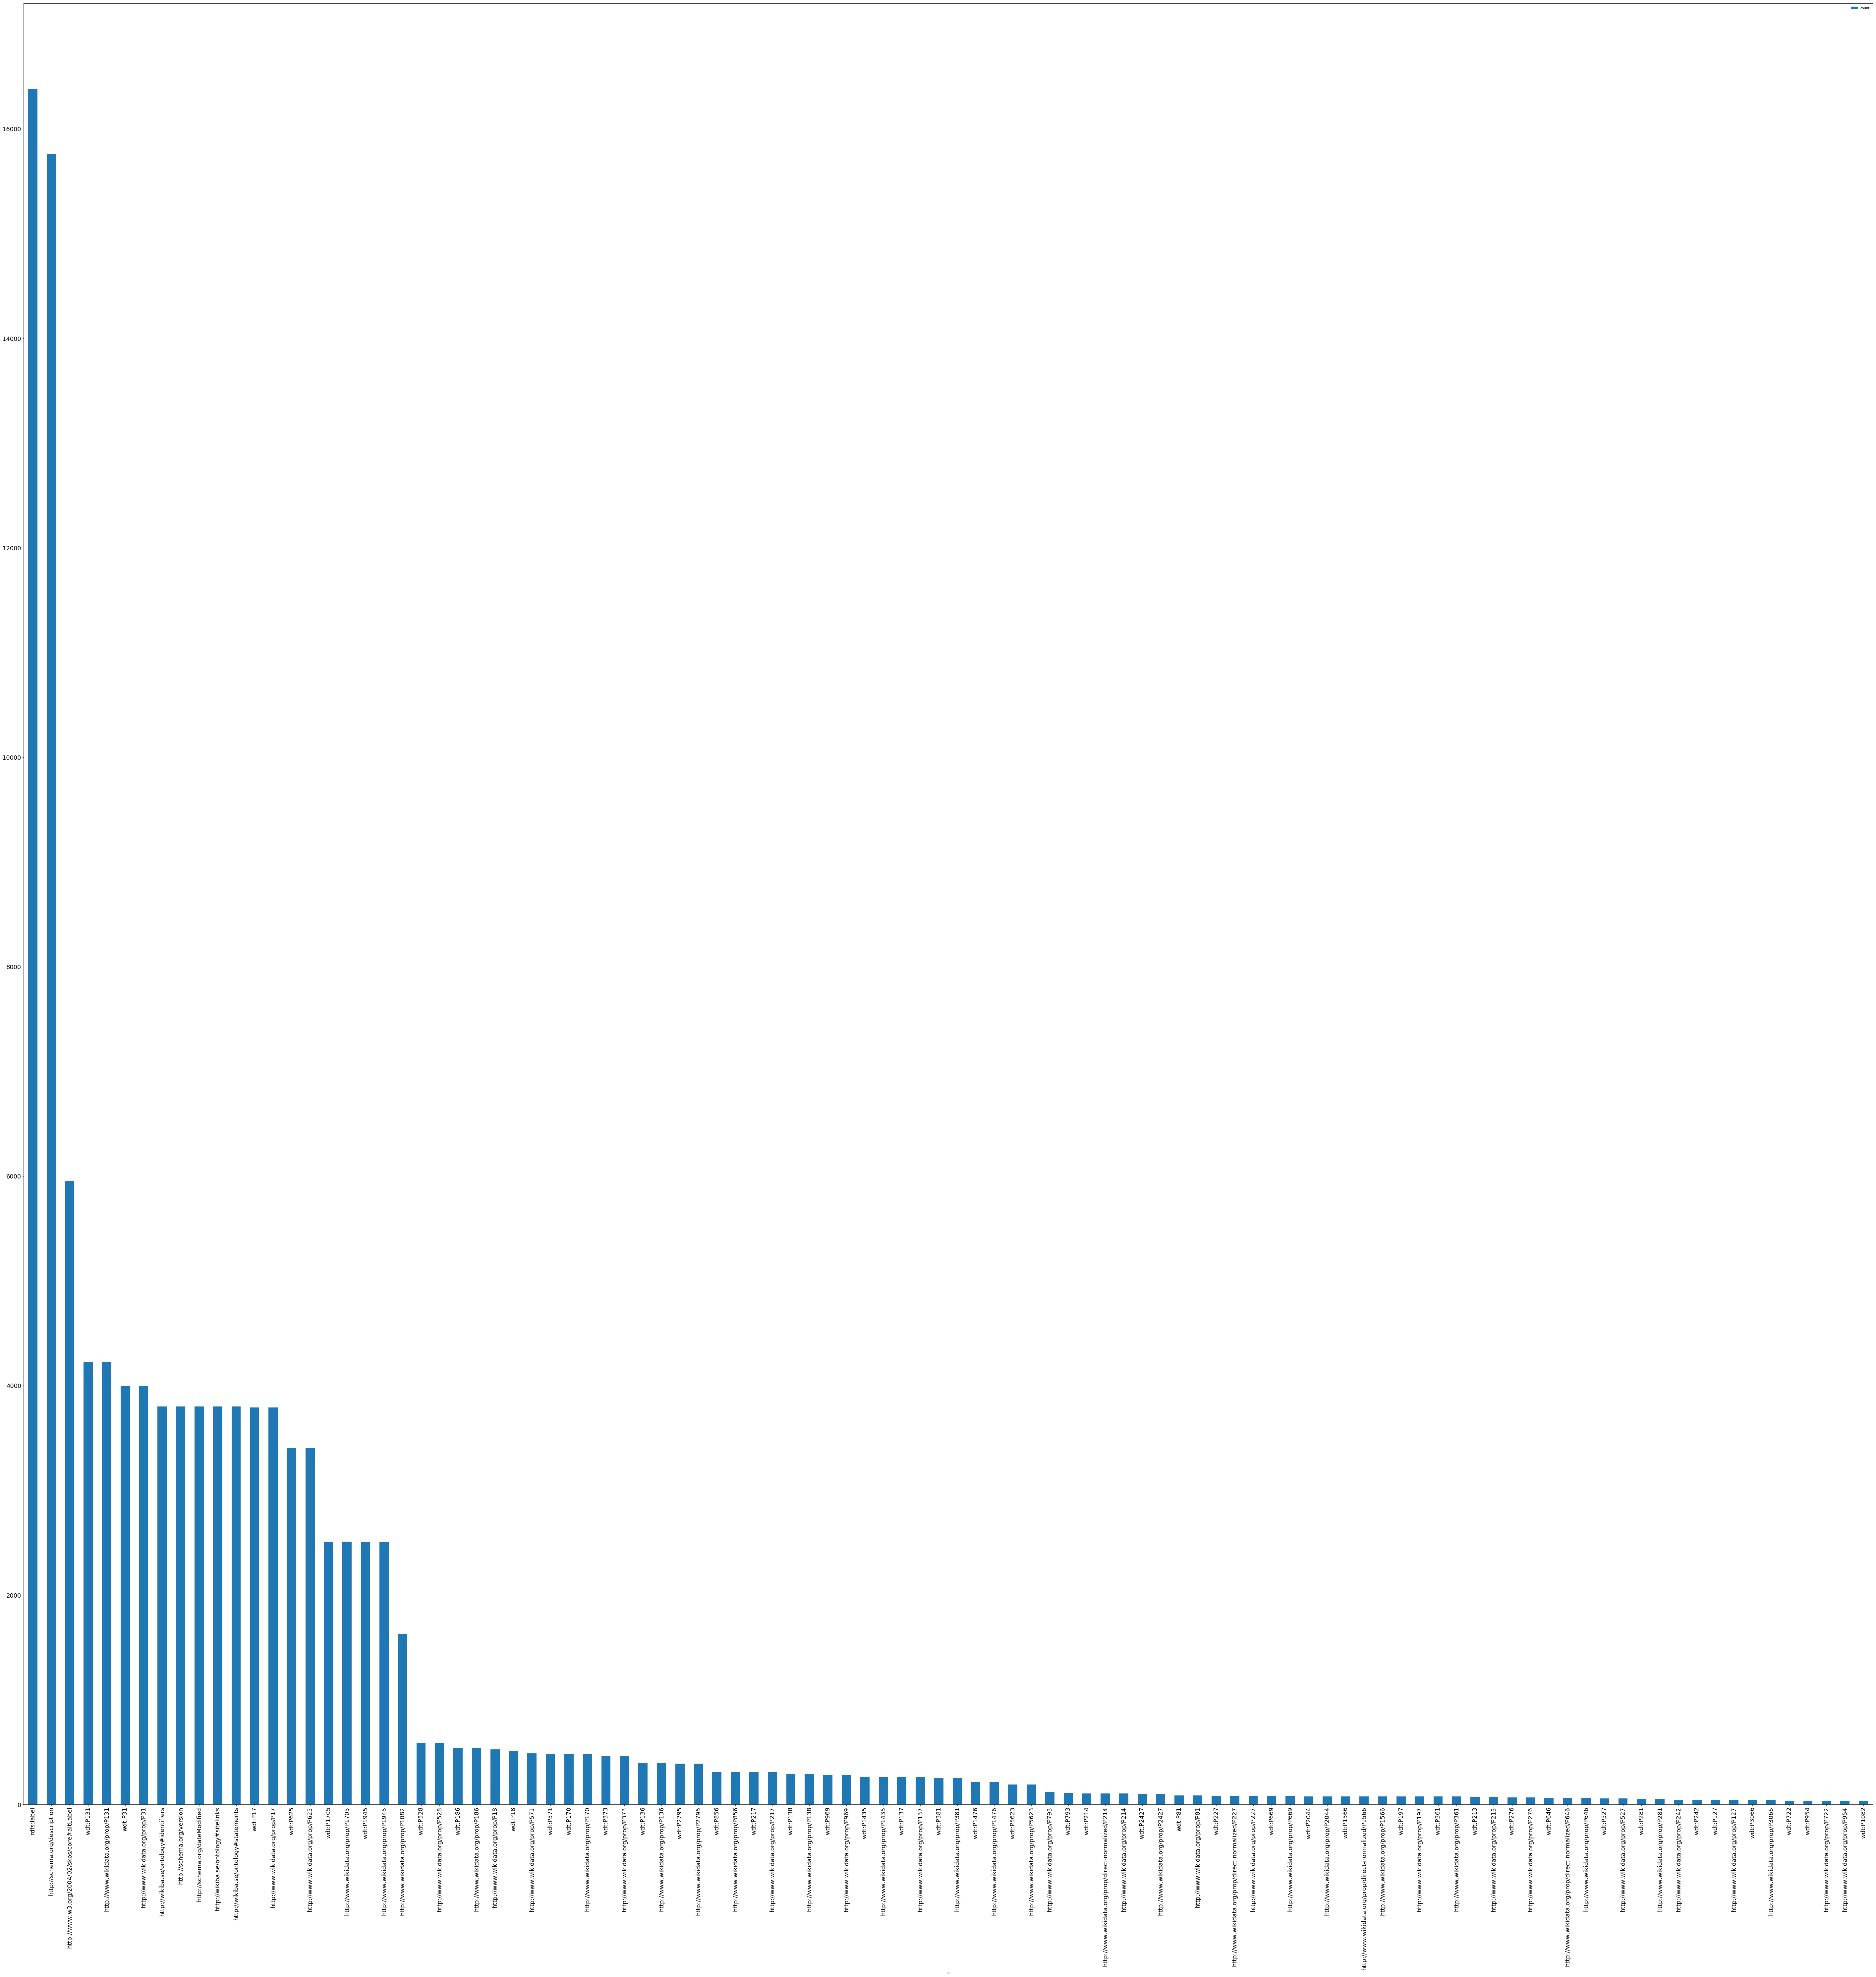

In [11]:
mostused_predicates.plot(kind='bar',fontsize=18,figsize=(100,100))

## Part III - Executing SPARQL queries via the Wikidata (MediaWiki) API

In [12]:
import requests

In [13]:
# We use one of the previous queries, now without the default view set to map, because we would like the data
query = '''
SELECT ?thing ?location ?distance ?thingLabel WHERE {

    SERVICE wikibase:around { 
      ?thing wdt:P625 ?location . 
      bd:serviceParam wikibase:center "Point(8.548333 47.374722)"^^geo:wktLiteral .
      bd:serviceParam wikibase:radius "2" . 
      bd:serviceParam wikibase:distance ?distance .
    } 
    ?thing p:P528 ?statement . ?statement pq:P972 wd:Q53629101 .

  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
} ORDER BY ?distance LIMIT 100
'''

In [14]:
endpoint_url='http://query.wikidata.org/sparql'
#url = 'https://query.wikidata.org/bigdata/namespace/wdq/sparql'
data = requests.get(endpoint_url, params={'query': query, 'format': 'json'})
data_json = data.json()

print(data_json)


{'head': {'vars': ['thing', 'location', 'distance', 'thingLabel']}, 'results': {'bindings': [{'thing': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q55169895'}, 'location': {'datatype': 'http://www.opengis.net/ont/geosparql#wktLiteral', 'type': 'literal', 'value': 'Point(8.54808902 47.37473133)'}, 'distance': {'datatype': 'http://www.w3.org/2001/XMLSchema#double', 'type': 'literal', 'value': '0.018'}, 'thingLabel': {'type': 'literal', 'value': 'Q55169895'}}, {'thing': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q55167900'}, 'location': {'datatype': 'http://www.opengis.net/ont/geosparql#wktLiteral', 'type': 'literal', 'value': 'Point(8.54818578 47.3751074)'}, 'distance': {'datatype': 'http://www.w3.org/2001/XMLSchema#double', 'type': 'literal', 'value': '0.044'}, 'thingLabel': {'type': 'literal', 'value': 'Q55167900'}}, {'thing': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q55167943'}, 'location': {'datatype': 'http://www.opengis.net/ont/geosparql#w

In [15]:
results = data_json['results']['bindings']
results

[{'thing': {'type': 'uri',
   'value': 'http://www.wikidata.org/entity/Q55169895'},
  'location': {'datatype': 'http://www.opengis.net/ont/geosparql#wktLiteral',
   'type': 'literal',
   'value': 'Point(8.54808902 47.37473133)'},
  'distance': {'datatype': 'http://www.w3.org/2001/XMLSchema#double',
   'type': 'literal',
   'value': '0.018'},
  'thingLabel': {'type': 'literal', 'value': 'Q55169895'}},
 {'thing': {'type': 'uri',
   'value': 'http://www.wikidata.org/entity/Q55167900'},
  'location': {'datatype': 'http://www.opengis.net/ont/geosparql#wktLiteral',
   'type': 'literal',
   'value': 'Point(8.54818578 47.3751074)'},
  'distance': {'datatype': 'http://www.w3.org/2001/XMLSchema#double',
   'type': 'literal',
   'value': '0.044'},
  'thingLabel': {'type': 'literal', 'value': 'Q55167900'}},
 {'thing': {'type': 'uri',
   'value': 'http://www.wikidata.org/entity/Q55167943'},
  'location': {'datatype': 'http://www.opengis.net/ont/geosparql#wktLiteral',
   'type': 'literal',
   'value